# Test KL minimization with invertible transformation

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from gpsr.beams import NSFDist

In [19]:
ndim = 2
nsamp = 10_000

dist = NSFDist(width=64, depth=3, layers=3, ndim=ndim)
prior = torch.distributions.MultivariateNormal(
    torch.zeros(ndim),
    torch.eye(ndim),
)
optimizer = torch.optim.Adam(dist.parameters(), lr=0.01)

history = {"loss": []}

for iteration in range(50):
    loss = -dist.entropy(nsamp, prior=prior)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    history["loss"].append(loss.item())

    if iteration % 10 == 0:
        print(iteration, loss)

0 tensor(0.0606, grad_fn=<NegBackward0>)
10 tensor(0.0262, grad_fn=<NegBackward0>)
20 tensor(0.0054, grad_fn=<NegBackward0>)
30 tensor(0.0021, grad_fn=<NegBackward0>)
40 tensor(0.0011, grad_fn=<NegBackward0>)


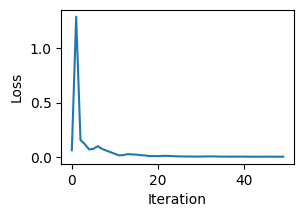

In [20]:
fig, ax = plt.subplots(figsize=(3.0, 2.0))
ax.plot(history["loss"])
ax.set_xlabel("Iteration")
ax.set_ylabel("Loss")
plt.show()

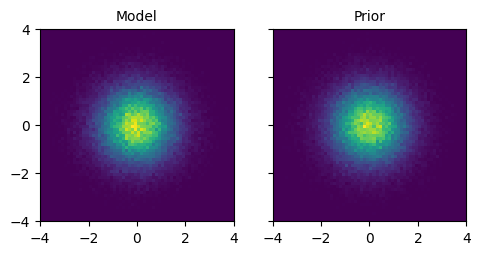

In [21]:
with torch.no_grad():
    x_model = dist.sample(100_000)
    x_prior = prior.rsample((x_model.shape[0],))

    plot_xmax = 4.0
    plot_limits = 2 * [(-plot_xmax, plot_xmax)]

    fig, axs = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(5.5, 2.5))
    for ax, x in zip(axs, [x_model, x_prior]):
        ax.hist2d(x[:, 0], x[:, 1], bins=64, range=plot_limits, density=True)
    axs[0].set_title("Model", fontsize="medium")
    axs[1].set_title("Prior", fontsize="medium")
    plt.show()

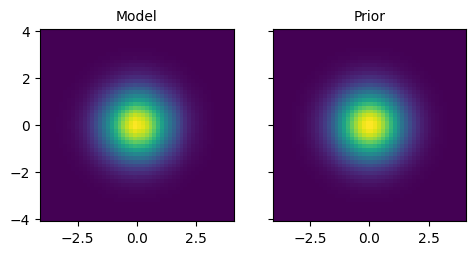

In [22]:
with torch.no_grad():
    grid_shape = (50, 50)
    grid_coords = [torch.linspace(-4.0, 4.0, n) for n in grid_shape]
    grid_points = torch.stack([c.ravel() for c in torch.meshgrid(*grid_coords, indexing="ij")], axis=-1)
    grid_values_model = torch.exp(dist.log_prob(grid_points)).reshape(grid_shape)
    grid_values_prior = torch.exp(prior.log_prob(grid_points)).reshape(grid_shape)

    fig, axs = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(5.5, 2.5))
    for ax, grid_values in zip(axs, [grid_values_model, grid_values_prior]):
        ax.pcolormesh(grid_coords[0], grid_coords[1], grid_values.T)
    axs[0].set_title("Model", fontsize="medium")
    axs[1].set_title("Prior", fontsize="medium")
    plt.show()

### 6D

In [23]:
ndim = 6
nsamp = 10_000

dist = NSFDist(width=64, depth=3, layers=3, ndim=ndim)
prior = torch.distributions.MultivariateNormal(
    torch.zeros(ndim),
    torch.eye(ndim),
)
optimizer = torch.optim.Adam(dist.parameters(), lr=0.01)

history = {"loss": []}

for iteration in range(50):
    loss = -dist.entropy(nsamp, prior=prior)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    history["loss"].append(loss.item())

    if iteration % 10 == 0:
        print(iteration, loss)

0 tensor(0.3738, grad_fn=<NegBackward0>)
10 tensor(0.0517, grad_fn=<NegBackward0>)
20 tensor(0.0099, grad_fn=<NegBackward0>)
30 tensor(0.0057, grad_fn=<NegBackward0>)
40 tensor(0.0023, grad_fn=<NegBackward0>)


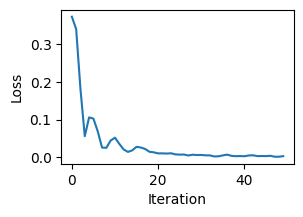

In [24]:
fig, ax = plt.subplots(figsize=(3.0, 2.0))
ax.plot(history["loss"])
ax.set_xlabel("Iteration")
ax.set_ylabel("Loss")
plt.show()

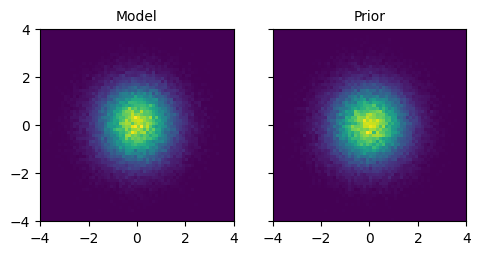

In [25]:
with torch.no_grad():
    x_model = dist.sample(100_000)
    x_prior = prior.rsample((x_model.shape[0],))

    plot_xmax = 4.0
    plot_limits = 2 * [(-plot_xmax, plot_xmax)]

    fig, axs = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(5.5, 2.5))
    for ax, x in zip(axs, [x_model, x_prior]):
        ax.hist2d(x[:, 0], x[:, 1], bins=64, range=plot_limits, density=True)
    axs[0].set_title("Model", fontsize="medium")
    axs[1].set_title("Prior", fontsize="medium")
    plt.show()

Evaluate the density on the slice $\rho(x_1, x_2, | x_3 = \dots = x_n = 0)$.

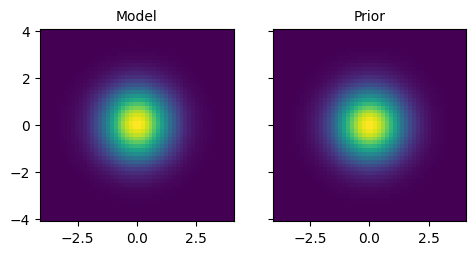

In [26]:
with torch.no_grad():
    grid_shape = (50, 50)
    grid_coords = [torch.linspace(-4.0, 4.0, n) for n in grid_shape]
    grid_points = torch.stack([c.ravel() for c in torch.meshgrid(*grid_coords, indexing="ij")], axis=-1)
    
    slice_points = torch.zeros((grid_points.shape[0], ndim - 2))
    grid_points = torch.hstack([grid_points, slice_points])
    
    grid_values_model = torch.exp(dist.log_prob(grid_points)).reshape(grid_shape)
    grid_values_prior = torch.exp(prior.log_prob(grid_points)).reshape(grid_shape)

    fig, axs = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(5.5, 2.5))
    for ax, grid_values in zip(axs, [grid_values_model, grid_values_prior]):
        ax.pcolormesh(grid_coords[0], grid_coords[1], grid_values.T)
    axs[0].set_title("Model", fontsize="medium")
    axs[1].set_title("Prior", fontsize="medium")
    plt.show()